<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7

# Today's Lecture

1. Sequence Models
2. Recurrent Neural Networks (RNNs)
3. Architecture of RNNs
3. Backpropogation through time (BPTT)
4. LSTMs and GRUs

# Introduction

Neural networks are designed in such a way that input features are largely independent of one another. However, there are certain datatypes that have sequential dependencies. For example:

1. Time Series Data: Values on successive time stamps are closely related to one another. Every successive value cannot be considered being independent form the other because in time-series data each value is dependent on the previous one.

2. Textual Data: Usually text is treated as a bag of words until recently there is greater emphasis on the ordering of the words used for better semantic insights. It is important to construct a model that takes sequential information into account.

3. Biological Data: This comprises of sequences of symbols corresponding to amino acids that form building blocks of DNA.

# Processing Sequences

Because any Deep learning model identifies numbers (and not symbols or text) we need some way of representing these non-numeric values. Let us consider text representation as a bag of words model. Consider the sentence:

*Analytics is hardly any fun*

Let us assume we want to do some sentiment analysis using words like these. One possible solution is to create one-hot encoded vectors for each of the words. Using the English vocabulary we can have vectors of size 20000(typical number of words used) where each word's position represents the occurence of that word in a sentence.

We can use these vectors as inputs to our Feed forward network to perform sentiment analysis. In the input layer we can have one input for each word/position in the sentence. The entire dataset can have different sized sentences and using variable input sizes is impossible in a conventional neural network. Additionally, small changes in word ordering can lead to semantically different connotations. Therefore, it is important to encode word ordering more directly within the architecture of the network. 

Two important considerations for processing of sequences would be:

1. The ability to receive and process inputs in the same order as they are present in the sequence.

2. Treatment of inputs at each time-stamp in a similar manner in relation to previous history of inputs.



# RNN Model

The above mentioned objective can be achieved using recurrent neural networks or RNNs. In RNNs there is one-to-one correspondence between the layers in the network and the position of an element in a sequence. Each position is referred to as a timestamp. Therefore, instead of different sized inputs, we have variable number of layers and each layer has a single input corresponding to that timestamp. Some examples of this time-layered architecture are:

1. A sentence in some text where the output is the next word in the sequence.

2. Time series analysis: Learning the next element in time series data.

3. Input in one language converted to (output) in another language.

4. Sentiment analysis, where input is some text and output is a vector of probability values.


RNN has the following models:

1. One to Many: RNN takes one input lets say an image and generates a sequence of words.

2. Many to One: RNN takes sequence of words as input and generates one output.

3. Many to Many: RNN takes sequence of words as input and generates sequence of words as output. (lets say language translations).

# RNN Architecture

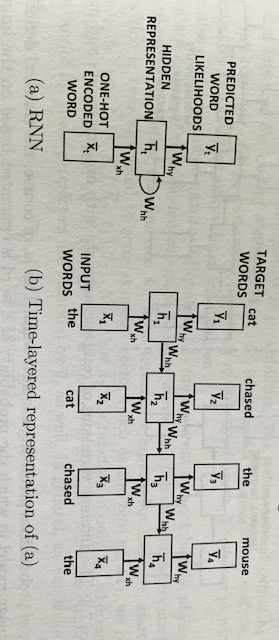

The simplest RNN is shown in Fig(a) above. There is a self loop present. It is this self loop that leads to the hidden state of the neural network in the subsequent layers. Fig(b) is a time-layered RNN which looks like a feed forward network. Mathematically speaking, both networks are equivalent but its better to comprehend the second one.

The architecture shown above is that of a language model. A language model is a well-known concept in natural language processing where we predict the next word based on the previous sequence of words. Given a sequence of words their one-hot encoding is fed into the network (one at a time). This is equivalent to feeding input words to the inputs at correct time stamps.

A timestamp corresponds to a position in the sequence (starts at 0 or 1) and moves forward by 1. In the setting of language modelling, the output is a vector of probabilitites predicted for the next word in the sequence. In the above example: When the word 'The' is the input the ouput will be a vector of probabilities of the entire lexicon that includes the word 'cat', and when 'cat' is the input we will get a vector of probabilities predicting the next word.

# Notation

Input vector at time $t$ (one hot encoded vector for the t-th word) $\bar{x}_t$.

The hidden state at time $t$ is $\bar{h}_t$.

Ouput vector at time $t$ (predicted probabilities of the $(t+1)$th word is $\bar{y}_t$. 

If the size of the lexicon is $d$ then the dimensions of $\bar{x}_t$ and $\bar{y}_t$ are $d$.

The hidden vector $\bar{h}_t$ is $p$ dimensional, where $p$ regulates the complexity of the embeddings.

We consider the scenario when all inputs are present in all time stamps. The hidden state at time $t$ is given by the following recurrent relationship:

$\bar{h}_t = f(\bar{h}_{t-1},\bar{x}_t)$

This function is defined with the use of weight matrices and activation functions and the same weights are used at each time stamp. A separate function is used to learn the output probabilities from the hidden layer i.e. $\bar{y}_t = g(\bar{h}_t)$.

We have a $p X d$ input hidden matrix $W_{xh}$, a $pXp$ hidden matrix $W_{hh}$ and a $dXp$ hidden output matrix $W_{hy}$.

The conditions for output are as follows:

$\bar{h}_t= tanh(W_{xh}\bar{x}_t + W_{hh}\bar{h}_{t-1})$

$\bar{y}_t=W_{hy}\bar{h}_{t}$

The $p$ dimensional output $\bar{h}_t$ of the hidden layer at the end of a text segment of t words yields its embedding, and the p-dimensional columns of $W_{xh}$ yield embedding of individual words.

# Example

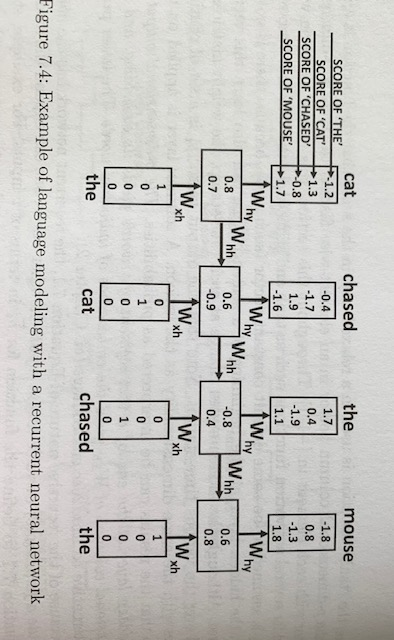

# Backpropogation Through Time (BPTT)

We have more than one output in our language generation model. Therefore, the output vector $\bar{y}_t$ has components $[\hat{y}^1_t...\hat{y}^d_t]$. Finally it is converted into a vector of probabilities using a Softmax function:

$[\hat{p}^1_t...\hat{p}^d_t] = Softmax([\hat{y}^1_t...\hat{y}^d_t])$

If $j_t$ is the index of the ground-truth word at time t in the training data, then the loss function $L$ is defined for all time stamps as the sum of all losses:

$L = -\sum^T_{t=1}log(\hat{p}^{j_{t}}_t)$

This is a result of cross-entropy error used with the softmax function.

Conceptually, BPTT works by unrolling all input timesteps. Each timestep has one input timestep, one copy of the network, and one output. Errors are then calculated and accumulated for each timestep. The network is rolled back up and the weights are updated.

Spatially, each timestep of the unrolled recurrent neural network may be seen as an additional layer given the order dependence of the problem and the internal state from the previous timestep is taken as an input on the subsequent timestep.

We can summarize the algorithm as follows:

Present a sequence of timesteps of input and output pairs to the network.
Unroll the network then calculate and accumulate errors across each timestep.

Roll-up the network and update weights.

Repeat.

BPTT can be computationally expensive as the number of timesteps increases.

The main issue for BPTT is that of weight sharing. the main trick to handle shared weights is to pretend that parameters in different layers are independent of one another. Let us introduce temporal variables for a time step t: 

$W^{t}_{xh}$, $W^{t}_{hh}$ and $W^{t}_{xy}$

Conventional Backpropogation is performed by working under the pretense that variables are independent from one another. Next the contributions of all time steps is taken together for a single gradient descent update. Steps of BPTT are summarized here:

1. Run the input sequentially in the forward direction through time and compute the errors (negative-log loss of softmax layer) at each time stamp.

2. Compute the gradients of all weights in the backward direction without any regard to the fact that weigths are shared. In this step we compute the following: $\frac{\partial{L}}{\partial{W^{t}_{xh}}}$,$\frac{\partial{L}}{\partial{W^{t}_{hh}}}$, $\frac{\partial{L}}{\partial{W^{t}_{hy}}}$

3. Add the weights for the final update:

$\frac{\partial{L}}{\partial{W_{xh}}}$ = $\sum^{T}_{t=1}\frac{\partial{L}}{\partial{W^{t}_{xh}}}$

$\frac{\partial{L}}{\partial{W_{hh}}}$ = $\sum^{T}_{t=1}\frac{\partial{L}}{\partial{W^{t}_{hh}}}$

$\frac{\partial{L}}{\partial{W_{hy}}}$ = $\sum^{T}_{t=1}\frac{\partial{L}}{\partial{W^{t}_{hy}}}$


# Truncated BPTT

One of the computational problems with BPTT is that it can take too long to train.
We can truncate the number of steps above. In practice this works quite well. It is what is commonly referred to as truncated backpropgation through time [Jaeger, 2002]. One of the consequences of this is that the model focuses primarily on short-term influence rather than long-term consequences. This is actually desirable, since it biases the estimate towards simpler and more stable models. In other words, only the portion of the loss over relevant segments is computed and used for weight updates.

# Practical Issues

Problem of vanishing and exploding gradients: During back propagation, recurrent neural networks suffer from the vanishing gradient problem. Gradients are values used to update a neural networks weights. The vanishing gradient problem is when the gradient shrinks as it back propagates through time. If a gradient value becomes extremely small, it doesn’t contribute too much learning. Similarly, sometimes the gradients may become too big. Both issues arise due to the time layered structure of RNNs.

In recurrent neural networks, layers that get a small gradient update stops learning. Those are usually the earlier layers. So because these layers don’t learn, RNN’s can forget what it seen in longer sequences, thus having a short-term memory.

Reading for today:

[Link](https://submitty.cs.rpi.edu/courses/f21/csci4962/display_file?course_material_id=11)

# LSTM and GRU

The core concept of LSTM’s are the cell state, and it’s various gates. The cell state act as a transport highway that transfers relative information all the way down the sequence chain. You can think of it as the “memory” of the network. The cell state, in theory, can carry relevant information throughout the processing of the sequence. So even information from the earlier time steps can make it’s way to later time steps, reducing the effects of short-term memory. As the cell state goes on its journey, information get’s added or removed to the cell state via gates. The gates are different neural networks that decide which information is allowed on the cell state.

[Link1](https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235)

[Link2](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

[Must Read 1](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[Must Read 2](https://medium.datadriveninvestor.com/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577)

Implementing LSTMS:

[Link](https://medium.com/deep-learning-with-keras/lstm-understanding-the-number-of-parameters-c4e087575756#:~:text=Summary%20indicates%20the%20total%20number,48%20as%20we%20computed%20above!)

# Readings

[Paper 1](http://www-i6.informatik.rwth-aachen.de/publications/download/820/Sundermeyer-2012.pdf)

[Paper 2](https://arxiv.org/pdf/1409.1259.pdf)